In [30]:
import os

In [28]:
import numpy as np
import pandas as pd
from pathlib import Path

# Part 1

Find GDP data for EAGLEs (emerging and growth-leading economies) and calculate GDP per capita for each one:

- Brazil
- China
- India
- Indonesia
- Mexico
- Russia



In [33]:
from pandas_datareader import wb

In [34]:
matches = wb.search('gdp.*capita.*const')

In [35]:
matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
646,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
9150,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9152,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9154,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'World Bank, International Comparison Program...",Economy & Growth
9155,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [36]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['BRA', 'CHN', 'IND', 'IDN', 'MX', 'RUS'], start=2015, end=2018)

In [42]:
dat

NY.GDP.PCAP.KD
country            year                
Brazil             2018    11026.242161
                   2017    10990.186677
                   2016    10962.625494
                   2015    11431.154481
China              2018     7754.962119
                   2017     7308.065366
                   2016     6883.895425
                   2015     6484.435948
Indonesia          2018     4284.652535
                   2017     4120.428561
                   2016     3968.055911
                   2015     3824.274885
India              2018     2104.163292
                   2017     1987.341087
                   2016     1874.228501
                   2015     1751.664378
Mexico             2018    10385.297846
                   2017    10297.586208
                   2016    10206.893454
                   2015    10037.201490
Russian Federation 2018    11729.094374
                   2017    11469.675490
                   2016    11298.483736
                   2015    11282.057910

In [39]:
gdp = dat.reset_index()

In [43]:
gdp = gdp.pivot(index='year',columns='country',values='NY.GDP.PCAP.KD')

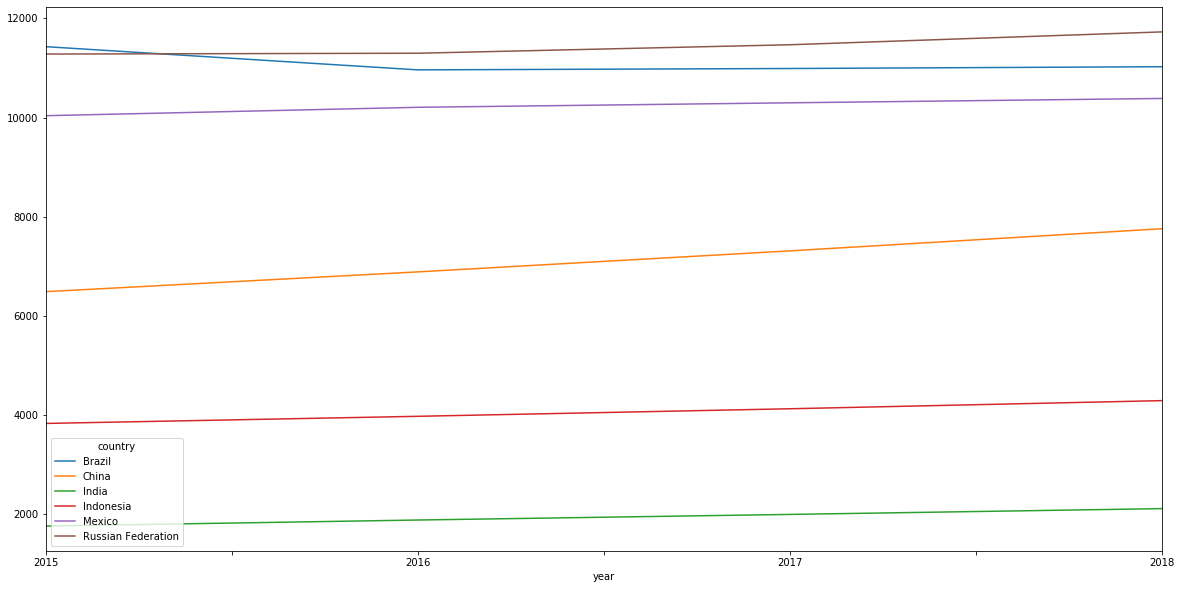

In [46]:
gdp.plot(figsize=(20,10))

# Part 2

For this part of the assignment, you will use the following csv files found in the data folder:
- gb_historical_sales_sample.csv — sample of 9 weeks of sales data.
- gb_cliente_tabla.csv — client names 
- gb_producto_tabla.csv — product names 
- gb_town_state.csv — town and state

**gb_historical_sales_sample fields**
- Semana — Week number (From Thursday to Wednesday)
- Agencia_ID — Sales Depot ID
- Canal_ID — Sales Channel ID
- Ruta_SAK — Route ID (Several routes = Sales Depot)
- Cliente_ID — Client ID
- NombreCliente — Client name
- Producto_ID — Product ID
- NombreProducto — Product Name
- Venta_uni_hoy — Sales unit this week (integer)
- Venta_hoy — Sales this week (unit: pesos)
- Dev_uni_proxima — Returns unit next week (integer)
- Dev_proxima — Returns next week (unit: pesos)
- Demanda_uni_equil — Adjusted Demand (integer)

## Read in all csvs into dataframes

In [ ]:
sales = pd.

### Answer

In [4]:
sales = pd.read_csv(Path('data/gb_historical_sales_sample.csv'))

In [5]:
sales.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


In [6]:
clients = pd.read_csv(Path('data/gb_cliente_tabla.csv'))

In [7]:
clients.head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


In [8]:
products = pd.read_csv(Path('data/gb_producto_tabla.csv'))

In [9]:
products.head()

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [10]:
locations = pd.read_csv(Path('data/gb_town_state.csv'))

In [11]:
locations.head()

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."


## Join all dataframes together

### Answer

In [12]:
sales_original = sales.copy(deep=True)

In [13]:
sales = sales.merge(right=clients, on='Cliente_ID')

In [14]:
sales = sales.merge(right=products, on='Producto_ID')

In [15]:
sales = sales.merge(right=locations, on='Agencia_ID')

In [ ]:
sales.head()

## What is the best selling item for all weeks combined? How much total revenue?

### Answer

In [17]:
sales.groupby(['NombreProducto']).Venta_hoy.sum().idxmax()

'Pan Blanco 640g BIM 2233'

In [18]:
sales.groupby(['NombreProducto']).Venta_hoy.sum().max()

3477086.1799992844

## Plot the performance per store per week.

### Answer

In [19]:
sales.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreCliente,NombreProducto,Town,State
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,PUESTO DE PERIODICOS LAZARO,Roles Canela 2p 120g BIM 1212,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,4,1110,7,3301,15766,1212,4,33.52,0,0.0,4,PUESTO DE PERIODICOS LAZARO,Roles Canela 2p 120g BIM 1212,2008 AG. LAGO FILT,"MÉXICO, D.F."
2,5,1110,7,3301,15766,1212,5,41.90,0,0.0,5,PUESTO DE PERIODICOS LAZARO,Roles Canela 2p 120g BIM 1212,2008 AG. LAGO FILT,"MÉXICO, D.F."
3,8,1110,7,3301,15766,1212,4,33.52,0,0.0,4,PUESTO DE PERIODICOS LAZARO,Roles Canela 2p 120g BIM 1212,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,9,1110,7,3301,15766,1212,1,8.38,0,0.0,1,PUESTO DE PERIODICOS LAZARO,Roles Canela 2p 120g BIM 1212,2008 AG. LAGO FILT,"MÉXICO, D.F."


In [20]:
store_sales = sales.groupby(['Semana','Agencia_ID']).Venta_hoy.sum()

In [21]:
store_sales = store_sales.to_frame().reset_index()

In [22]:
store_sales_view = store_sales.pivot(index='Semana',columns='Agencia_ID',values='Venta_hoy' )

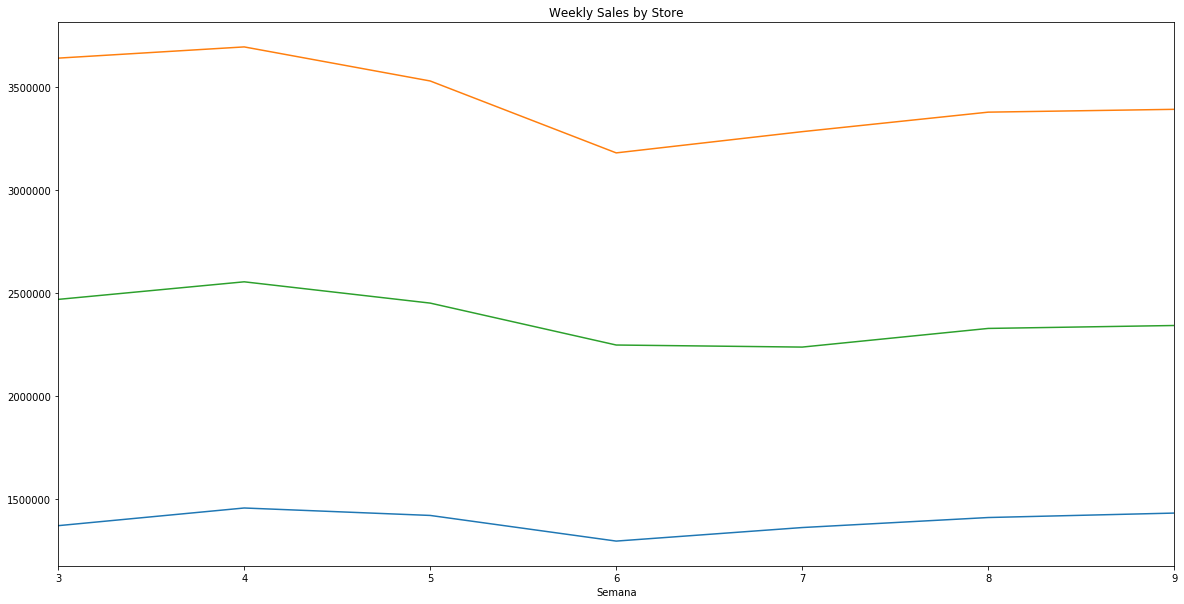

In [25]:
store_sales_view.plot(figsize=(20,10), legend=False, title='Weekly Sales by Store')